<a href="https://colab.research.google.com/github/Amansingh1202/Data-Science_Practice/blob/master/Keras/Imdb_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q keras

In [ ]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
import numpy as np

In [ ]:
def vectorize_sequence(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 99us/step - loss: 3.1120e-05 - acc: 1.0000 - val_loss: 1.4361 - val_acc: 0.8527
Epoch 2/20
15000/15000 [==============================] - 1s 94us/step - loss: 1.9482e-05 - acc: 1.0000 - val_loss: 1.4415 - val_acc: 0.8526
Epoch 3/20
15000/15000 [==============================] - 1s 94us/step - loss: 1.5198e-05 - acc: 1.0000 - val_loss: 1.4587 - val_acc: 0.8532
Epoch 4/20
15000/15000 [==============================] - 1s 93us/step - loss: 1.1955e-05 - acc: 1.0000 - val_loss: 1.5038 - val_acc: 0.8544
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.0014 - acc: 0.9997 - val_loss: 1.5519 - val_acc: 0.8531
Epoch 6/20
15000/15000 [==============================] - 1s 95us/step - loss: 8.1131e-06 - acc: 1.0000 - val_loss: 1.5546 - val_acc: 0.8542
Epoch 7/20
15000/15000 [==============================] - 1s 93us/step - loss: 6.5913e-06 - acc: 1.0000 - va

In [ ]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 72us/step


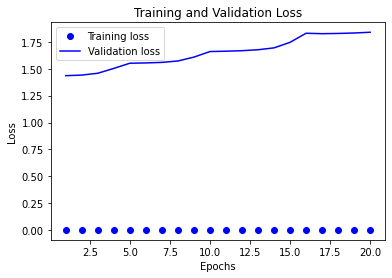

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results

[0.8848571354937553, 0.8486400246620178]

In [ ]:
model.fit(x_train,y_train,epochs=3,batch_size=512,validation_data=(x_val,y_val))

Train on 25000 samples, validate on 10000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 85us/step - loss: 0.0909 - acc: 0.9748 - val_loss: 0.1449 - val_acc: 0.9561
Epoch 2/3
25000/25000 [==============================] - 2s 85us/step - loss: 0.0756 - acc: 0.9789 - val_loss: 0.1146 - val_acc: 0.9648
Epoch 3/3
25000/25000 [==============================] - 2s 83us/step - loss: 0.0626 - acc: 0.9821 - val_loss: 0.0920 - val_acc: 0.9735


In [ ]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 2s 66us/step


[0.6286035150122643, 0.8508399724960327]

In [ ]:
model.predict(x_test)

array([[0.00625247],
       [1.        ],
       [0.80675083],
       ...,
       [0.06904048],
       [0.06566051],
       [0.9431013 ]], dtype=float32)

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model1.add(layers.Dense(32,activation='relu'))
model1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model1.fit(x_train,y_train,epochs=3,batch_size=512,validation_data=(x_val,y_val))
model1.predict(x_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/3
25000/25000 [==============================] - 3s 104us/step - loss: 0.4259 - acc: 0.8220 - val_loss: 0.2854 - val_acc: 0.8926
Epoch 2/3
25000/25000 [==============================] - 2s 98us/step - loss: 0.2395 - acc: 0.9120 - val_loss: 0.1770 - val_acc: 0.9430
Epoch 3/3
25000/25000 [==============================] - 2s 97us/step - loss: 0.1873 - acc: 0.9304 - val_loss: 0.1383 - val_acc: 0.9564


array([[0.20049268],
       [0.99958694],
       [0.81521404],
       ...,
       [0.11750823],
       [0.06833148],
       [0.5162296 ]], dtype=float32)

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model3.add(layers.Dense(16,activation='relu'))
model3.add(layers.Dense(1,activation='sigmoid'))
model3.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
model3.fit(x_train,y_train,epochs=3,batch_size=512,validation_data=(x_val,y_val))
model3.predict(x_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 86us/step - loss: 0.1679 - acc: 0.7982 - val_loss: 0.1056 - val_acc: 0.8957
Epoch 2/3
25000/25000 [==============================] - 2s 83us/step - loss: 0.0852 - acc: 0.9074 - val_loss: 0.0650 - val_acc: 0.9284
Epoch 3/3
25000/25000 [==============================] - 2s 83us/step - loss: 0.0622 - acc: 0.9290 - val_loss: 0.0477 - val_acc: 0.9494


array([[0.2609979 ],
       [0.9847881 ],
       [0.85203147],
       ...,
       [0.23961967],
       [0.12084839],
       [0.55290747]], dtype=float32)

In [ ]:
model4 = models.Sequential()
model4.add(layers.Dense(16,activation='tanh',input_shape=(10000,)))
model4.add(layers.Dense(16,activation='tanh'))
model4.add(layers.Dense(1,activation='sigmoid'))
model4.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model4.fit(x_train,y_train,epochs=3,batch_size=512,validation_data=(x_val,y_val))
model4.predict(x_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 89us/step - loss: 0.4295 - acc: 0.8323 - val_loss: 0.2547 - val_acc: 0.9191
Epoch 2/3
25000/25000 [==============================] - 2s 83us/step - loss: 0.2349 - acc: 0.9141 - val_loss: 0.1703 - val_acc: 0.9432
Epoch 3/3
25000/25000 [==============================] - 2s 83us/step - loss: 0.1783 - acc: 0.9334 - val_loss: 0.1265 - val_acc: 0.9612


array([[0.09402308],
       [0.99615544],
       [0.9664757 ],
       ...,
       [0.14457706],
       [0.03931105],
       [0.8401441 ]], dtype=float32)

In [ ]:
model5 = models.Sequential()
model5.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model5.add(layers.Dense(64,activation='relu'))
model5.add(layers.Dense(1,activation='sigmoid'))
model5.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model5.fit(x_train,y_train,epochs=3,batch_size=512,validation_data=(x_val,y_val))
model5.predict(x_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/3
25000/25000 [==============================] - 3s 127us/step - loss: 0.4174 - acc: 0.8160 - val_loss: 0.3189 - val_acc: 0.8672
Epoch 2/3
25000/25000 [==============================] - 3s 123us/step - loss: 0.2393 - acc: 0.9101 - val_loss: 0.1842 - val_acc: 0.9341
Epoch 3/3
25000/25000 [==============================] - 3s 123us/step - loss: 0.1790 - acc: 0.9320 - val_loss: 0.1380 - val_acc: 0.9519


array([[0.10887295],
       [0.9997169 ],
       [0.42731863],
       ...,
       [0.07666349],
       [0.03758523],
       [0.31348455]], dtype=float32)